## Data Visualization of Netflix

In [4]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


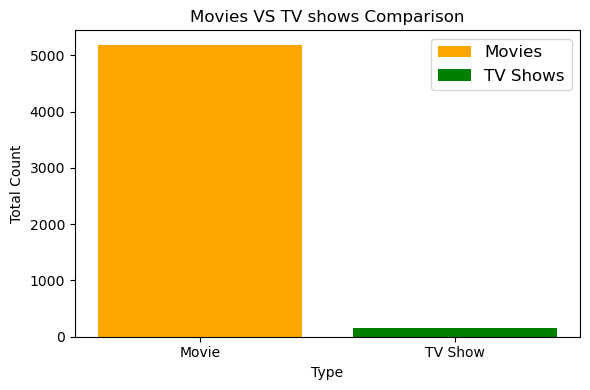

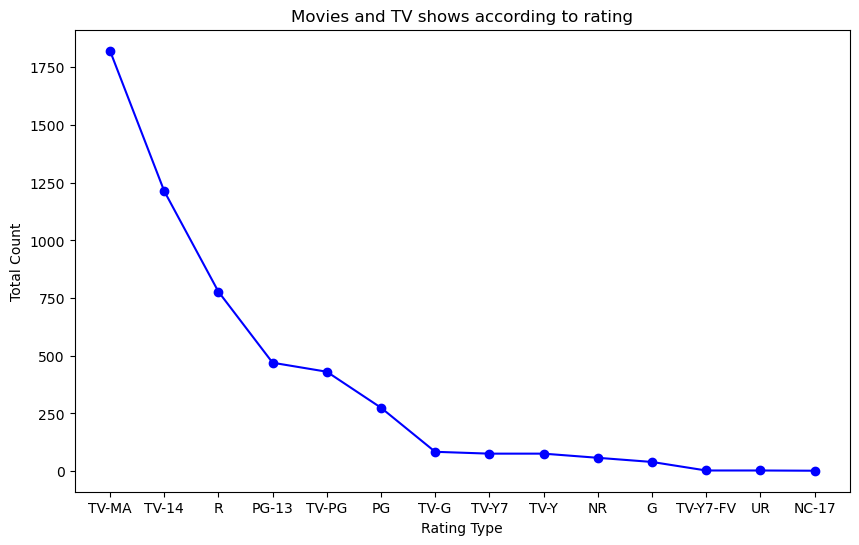

In [61]:
df = pd.read_csv("netflix_titles.csv");
#print(df.head());
print(df.columns);

# Clean Data
subset = ["show_id","type", "title", "director", "cast", "country",  "date_added", "release_year", 
          "rating", "duration","listed_in", "description"];
#print(pd.DataFrame(subset));
df = df.dropna(subset=subset);
#print(df.head());

type_counts = df["type"].value_counts();
plt.figure(figsize=(6, 4)),
plt.bar(type_counts.index, type_counts.values, color=["orange","green"], label=["Movies", "TV Shows"]);
plt.legend(loc="upper right", fontsize=12);
plt.title("Movies VS TV shows Comparison");
plt.xlabel("Type");
plt.ylabel("Total Count");
plt.tight_layout();
plt.savefig("movies_vs_tvshows.png", dpi=300);
plt.show();

rating_counts = df["rating"].value_counts();
plt.figure(figsize=(10, 6));
plt.plot(rating_counts.index, rating_counts.values, color="blue", marker="o");
plt.xlabel("Rating Type");
plt.ylabel("Total Count");
plt.title("Movies and TV shows according to rating");
plt.show();











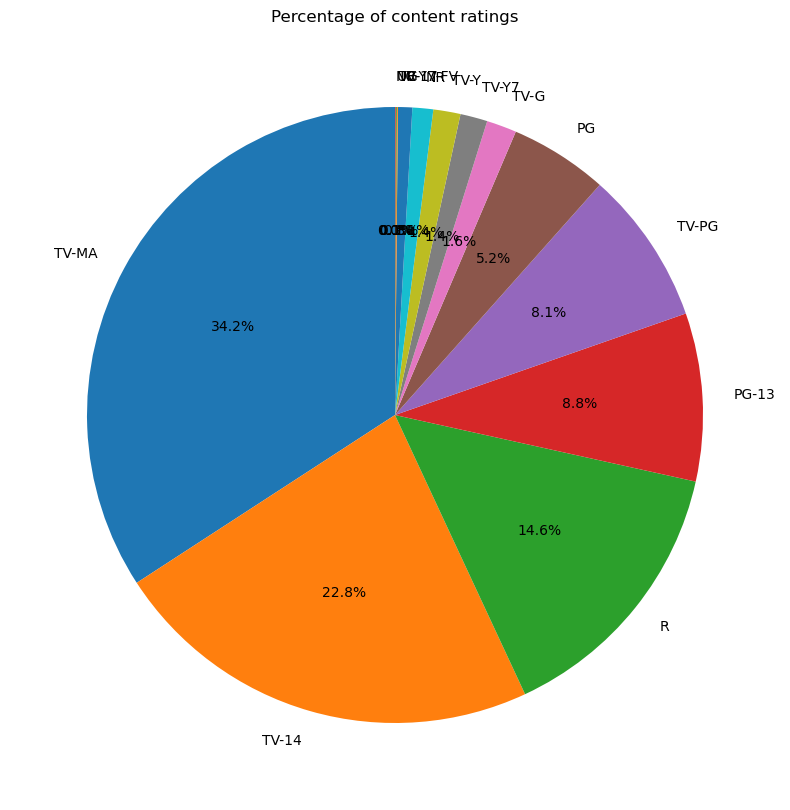

In [60]:
plt.figure(figsize=(20, 10));
plt.title("Percentage of content ratings");
plt.pie(rating_counts, labels=rating_counts.index, autopct="%1.1f%%", startangle = 90);
plt.show();

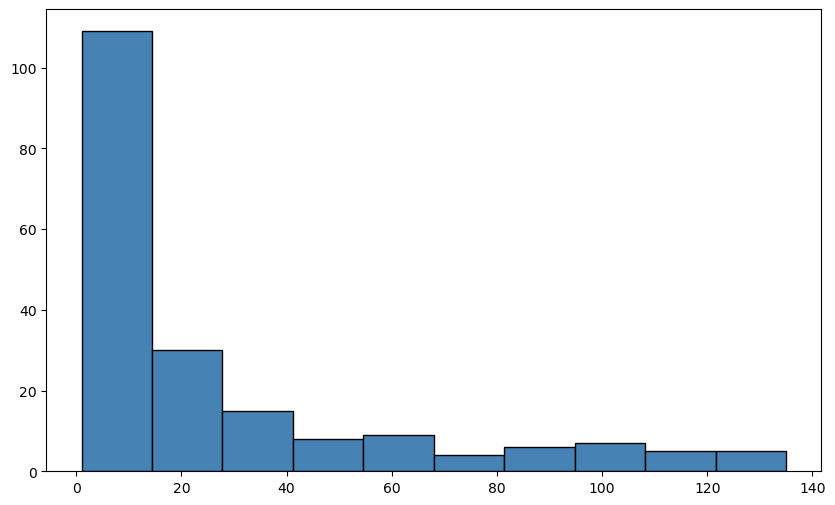

In [59]:
plt.figure(figsize=(10, 6));
duration_dist = df["duration"].value_counts();
plt.hist(duration_dist, bins=10, color="steelblue", edgecolor="black");
plt.show();

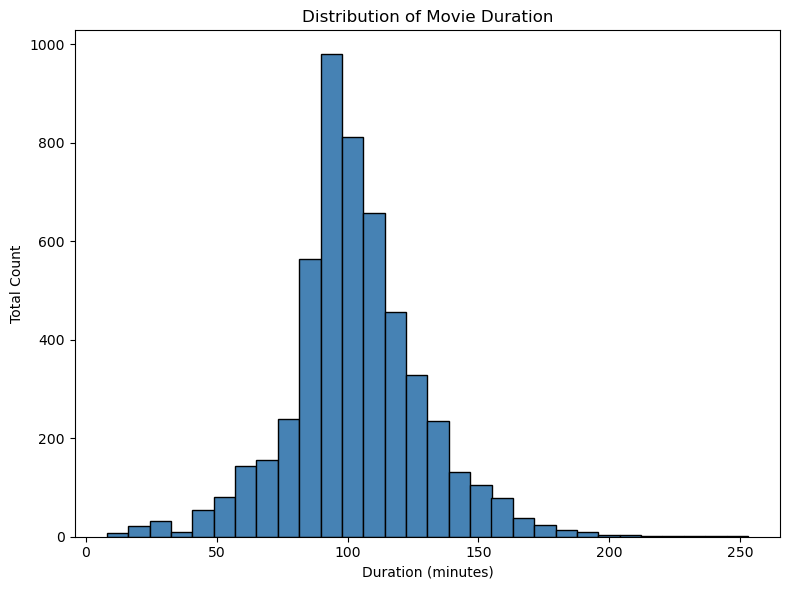

In [62]:
movie_df = df[df["type"]== "Movie"].copy();
movie_df["duration_int"] = movie_df["duration"].str.replace(" min","").astype(int);

plt.figure(figsize=(8, 6));
plt.hist(movie_df["duration_int"], bins=30, color="steelblue", edgecolor="black");
plt.title("Distribution of Movie Duration");
plt.xlabel("Duration (minutes)");
plt.ylabel("Total Count");
plt.tight_layout();
plt.savefig("movie_duration.png");
plt.show();

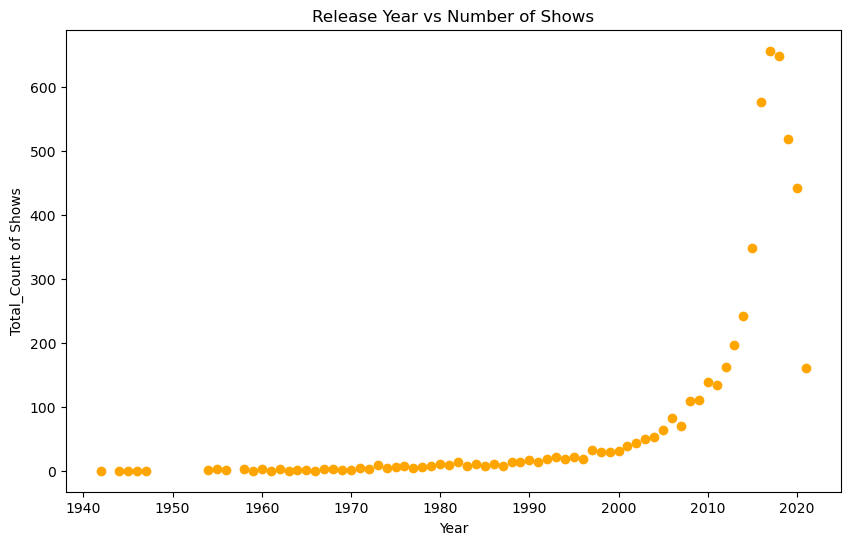

In [66]:
release_counts = df["release_year"].value_counts().sort_index();
plt.figure(figsize=(10, 6));
plt.scatter(release_counts.index, release_counts.values, color="orange");
plt.title("Release Year vs Number of Shows");
plt.xlabel("Year");
plt.ylabel("Total_Count of Shows");



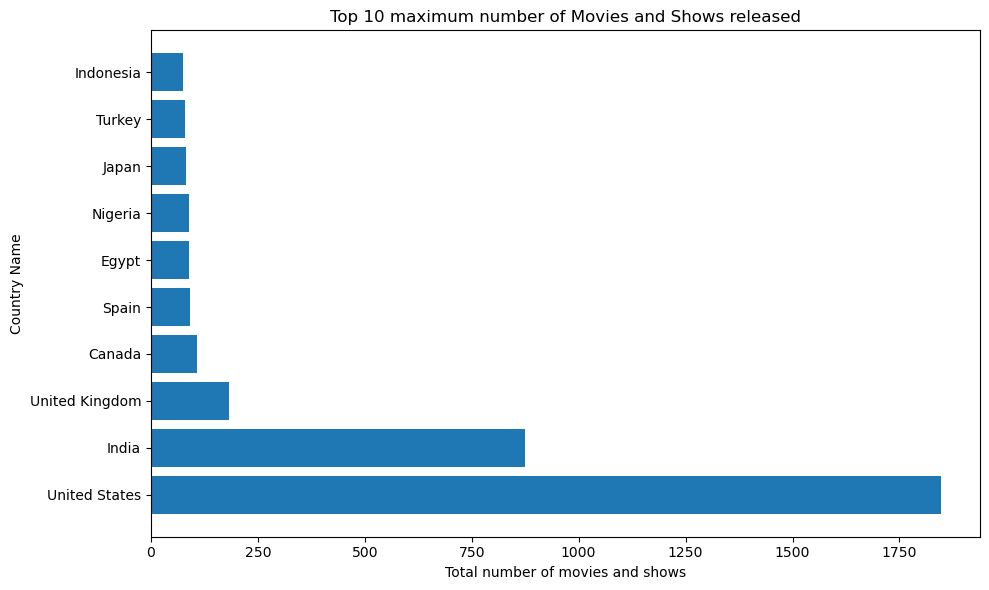

In [69]:
country_counts =  df["country"].value_counts().head(10);
plt.figure(figsize=(10,6));
plt.barh(country_counts.index,country_counts.values);
plt.title("Top 10 maximum number of Movies and Shows released");
plt.xlabel("Total number of movies and shows");
plt.ylabel("Country Name");
plt.tight_layout();
plt.show();



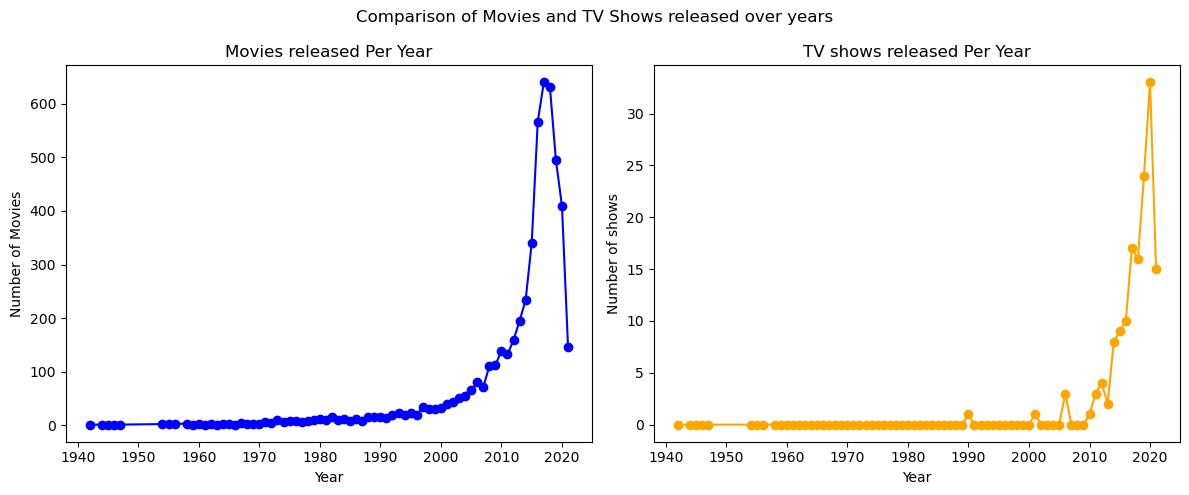

In [77]:
content_by_year = df.groupby(["release_year", "type"]).size().unstack().fillna(0);
fig,ax = plt.subplots(1, 2, figsize=(12, 5));

#first subplot movies
ax[0].plot(content_by_year.index, content_by_year["Movie"], color="blue", marker="o");
ax[0].set_title("Movies released Per Year");
ax[0].set_xlabel("Year");
ax[0].set_ylabel("Number of Movies");

# second subplot TV Shows

ax[1].plot(content_by_year.index, content_by_year["TV Show"], color="orange", marker="o");
ax[1].set_title("TV shows released Per Year");
ax[1].set_xlabel("Year");
ax[1].set_ylabel("Number of shows");
plt.suptitle("Comparison of Movies and TV Shows released over years");
plt.tight_layout();
plt.savefig("Compare_over_year.png", dpi=300);

